# Machine Learning and Linear Regression

For more on our first example please see the two links below:

* [Justin Markham's github page](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)

* Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*



In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-white')

# Example I: Testing your Knowledge

The dataset below contains the following information:
    
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the response?
- Sales: sales of a single product in a given market (in thousands of widgets)

Our goal is to explore the data using Linear Regression to both ask and answer some questions.  Your solution should include lines of best fit, correlation coefficients, and a nice visualization!

---

In [6]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<IPython.core.display.Javascript object>


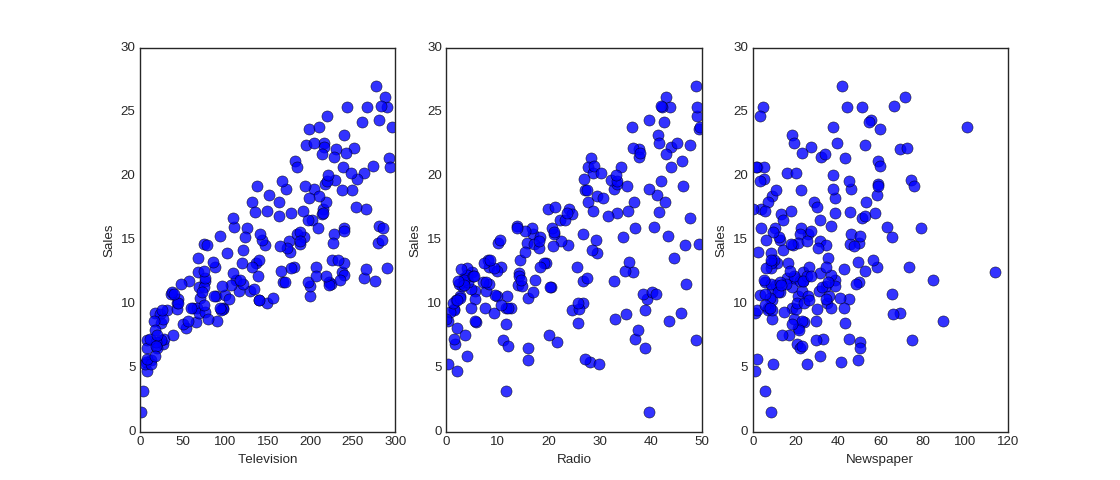

In [8]:
plt.figure(figsize = (14,6))
plt.subplot(1, 3, 1)
plt.plot(df['TV'], df['Sales'], 'o', markersize = 10, alpha = 0.8)
plt.xlabel('Television')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.plot(df['Radio'], df['Sales'], 'o', markersize = 10, alpha = 0.8)
plt.xlabel('Radio')
plt.ylabel('Sales')


plt.subplot(1, 3, 3)
plt.plot(df['Newspaper'], df['Sales'], 'o', markersize = 10, alpha = 0.8)
plt.xlabel('Newspaper')
plt.ylabel('Sales')

# Machine Learning 

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

The idea here is to create a model based on a subset of the data and to test this against the data points we ignored with our model creation.  We form two sets from the data-- a **test** set and a **training** set.  We create a model using the **training data** and we see how good this is with the **testing data**.

Python has a library called scikitlearn where the Machine Learning functions are housed.  It also comes with a few built in datasets, two of which we examine below.

First we will import the scikitlearn library and its datasets and linear_model modules.  

In [2]:
from sklearn import datasets, linear_model

Now we import the diabetes dataset and name it diabetes.

In [9]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

We select our x values from the data and name them diabetes_X.  We split this into a test and training set as well as then assign the y values and split them into two sets.

In [10]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Now we create a linear regression model and fit the data to this model.  Note that we are only creating a model based on our split data.

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we can print out the information about the model.

In [12]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


And plot the data as train and test splits including the line of best fit.

<IPython.core.display.Javascript object>


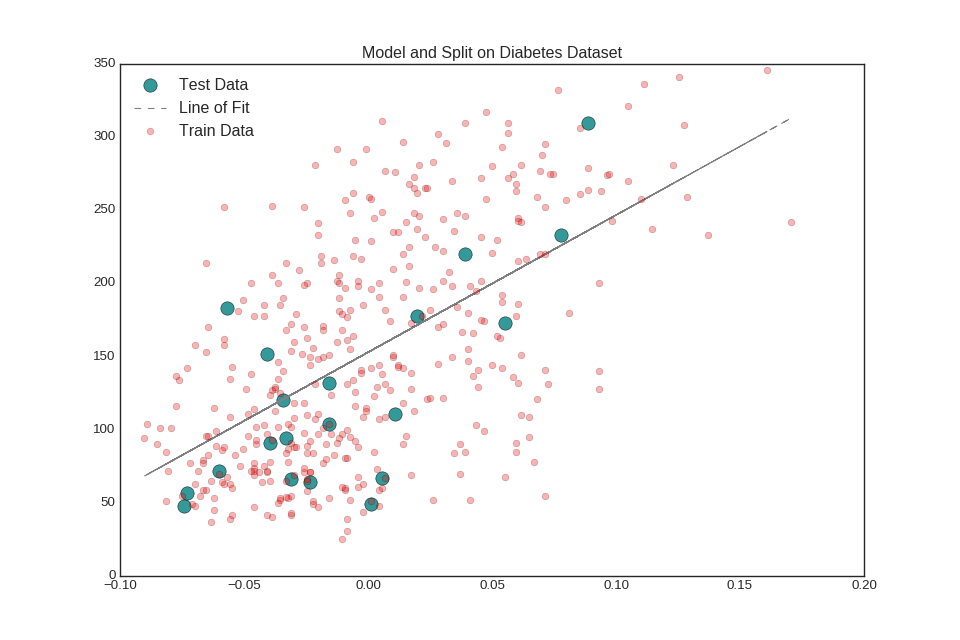

In [13]:
plt.figure(figsize=(12,8))
plt.plot(diabetes_X_test, diabetes_y_test,  'o', color = 'teal', markersize = 12, alpha = 0.8, label = 'Test Data')
plt.plot(diabetes_X, regr.predict(diabetes_X), '--', color = 'grey', label = 'Line of Fit')
plt.plot(diabetes_X_train, diabetes_y_train, 'o', color = 'red', label = 'Train Data', alpha = 0.3)
plt.legend(loc = 'best')
plt.title('Model and Split on Diabetes Dataset')


## Next Example

How can you use what you've learned to explore this dataset?

In [14]:
data = datasets.load_boston()
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      